<a href="https://colab.research.google.com/github/jef278/Projects_analysis/blob/main/FCS_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
import io
import numpy as np

uploaded = files.upload()
filename = next(iter(uploaded))
data = np.loadtxt(io.BytesIO(uploaded[filename]), delimiter=',', skiprows=1, encoding='utf-8')
lag = data[:, 0]
average = data[:, 1]

Saving FCSdata.csv to FCSdata (2).csv


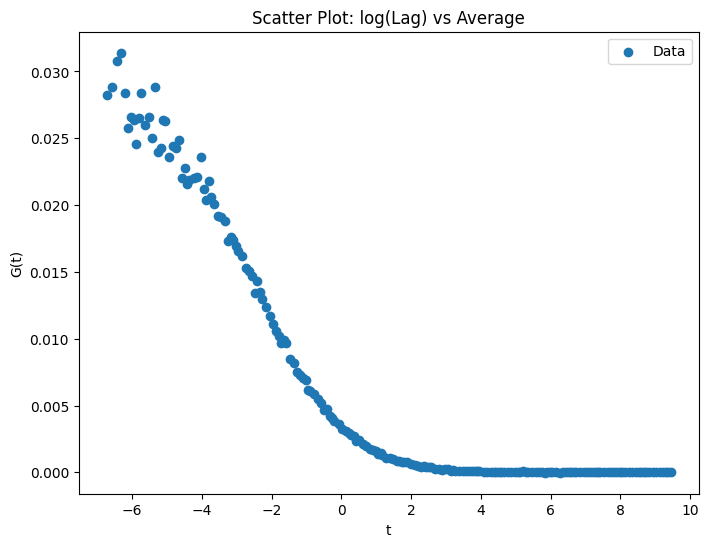

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(np.log(lag), average, label='Data')
plt.xlabel('t')
plt.ylabel('G(t)')
plt.title('Scatter Plot: log(Lag) vs Average')
plt.legend()
plt.show()


In [20]:
def get_param(prompt, default):
    val = input(f"{prompt} [{default}]: ")
    return float(val) if val.strip() else default

td = get_param('td', 0.0001)
tt = get_param('tt', 0.00001)
N = get_param('N', 5)
Ft = get_param('Ft', 0.2)
k = get_param('k', 121)
DC = get_param('DC', 0.01)


td [0.0001]: 0.01
tt [1e-05]: 0.0001
N [5]: 50
Ft [0.2]: 0.8
k [121]: 121
DC [0.01]: 0.00001


In [21]:
def G(t, td, tt, N, Ft, DC):
    term1 = 1/N
    term2 = (1 + t/td)**-1
    term3 = (1 + t/(td*121**2))**0.5
    term4 = Ft * np.exp(-t/tt) + (1 - Ft)
    return term1 * term2 * term3 * term4 + DC


In [22]:
from scipy.optimize import curve_fit

p0 = [td, tt, N, Ft, DC]
params, cov = curve_fit(G, lag, average, p0=p0, maxfev=10000)


/tmp/ipython-input-21-3009522807.py:4: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1 + t/(td*121**2))**0.5
/tmp/ipython-input-21-3009522807.py:5: RuntimeWarning: overflow encountered in exp
  term4 = Ft * np.exp(-t/tt) + (1 - Ft)
/tmp/ipython-input-22-3513081859.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(G, lag, average, p0=p0, maxfev=10000)


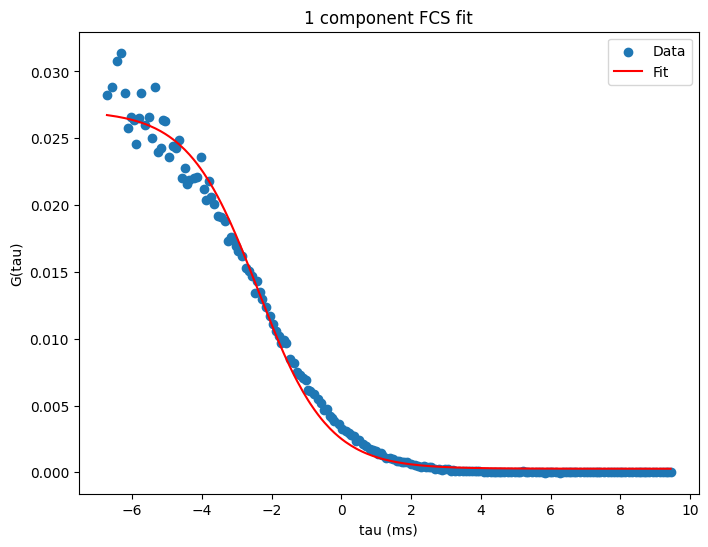

Fitted parameters: [ 9.08346400e-02  5.08172492e-05  3.98226224e+02 -9.67752852e+00
  2.71632817e-04]


In [24]:
plt.figure(figsize=(8,6))
plt.scatter(np.log(lag), average, label='Data')
plt.plot(np.log(lag), G(lag, *params), color='red', label='Fit')
plt.xlabel('tau (ms)')
plt.ylabel('G(tau)')
plt.title('1 component FCS fit')
plt.legend()
plt.show()
print("Fitted parameters:", params)


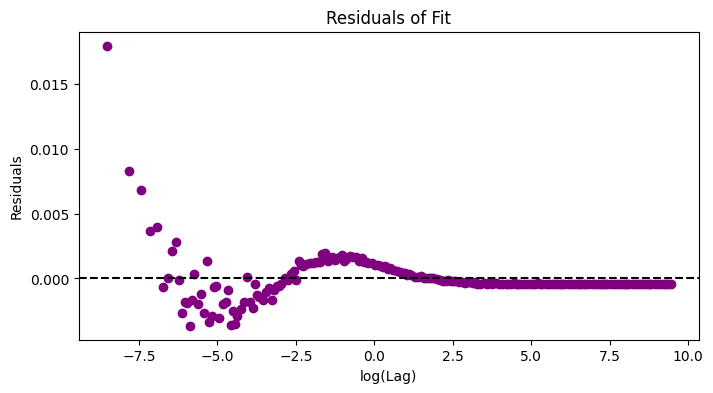

In [13]:
residuals = average - G(lag, *params)

plt.figure(figsize=(8, 4))
plt.scatter(np.log(lag), residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('log(Lag)')
plt.ylabel('Residuals')
plt.title('Residuals of Fit')
plt.show()
